# Principal Component Analysis for predicting salaries for baseball players

In [1]:
import pandas as pd
import numpy as np
import os
from os import path as op
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri, r
from rpy2.robjects.packages import importr
 
pandas2ri.activate()

# load your file
robjects.r['load']('Hitters.rda')

# retrieve the matrix that was loaded from the file
matrix = robjects.r['Hitters']

# turn the R matrix into a numpy array
a = np.array(matrix)

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [3]:
base = importr('base')
base.load('Hitters.rda');
rdf = base.mget(base.ls())
 
df = {}
for i,f in enumerate(base.names(rdf)):
    df[f] = pandas2ri.ri2py_dataframe(rdf[i])
 
for k,v in df.items():
    print(v.head())

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  


In [4]:
df = pd.DataFrame(df['Hitters'])
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
indicators=['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns',
           'CRBI','CWalks','PutOuts','Assists','Errors','Salary']

In [6]:
clean = df.dropna()
print(clean.shape)
clean.head()

(263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [7]:
df = df.loc[:, indicators]
df = df.dropna()
print(df.shape)
df.head()

(263, 17)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
x = StandardScaler().fit_transform(df)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
from array import *

pca = PCA()
pca.fit(x)
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
pc = np.array(list(range(1,18)))
eigensum = pd.DataFrame(var, index=pc, columns=['Cumulative % of PC of var'])
eigensum.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Cumulative % of PC of var,45.2,69.4,79.6,85.0,89.2,92.3,95.2,96.7,97.8,98.6,99.2,99.5,99.8,100.0,100.1,100.1,100.1


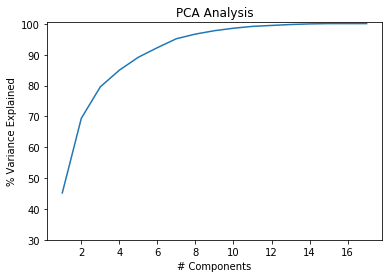

In [59]:
plt.ylabel('% Variance Explained')
plt.xlabel('# Components')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(list(range(1,18)),var);

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [67]:
finalDf = pd.concat([principalDf.reset_index(), df.reset_index()[['Salary']]], axis = 1).drop('index',axis=1)
finalDf.head()

,principal component 1,principal component 2,Salary
0,0.076848,1.653525,475.0
1,0.337127,-2.320560,480.0
2,3.408362,0.755757,500.0
3,-2.642221,-0.361486,91.5
4,1.071681,-1.511674,750.0


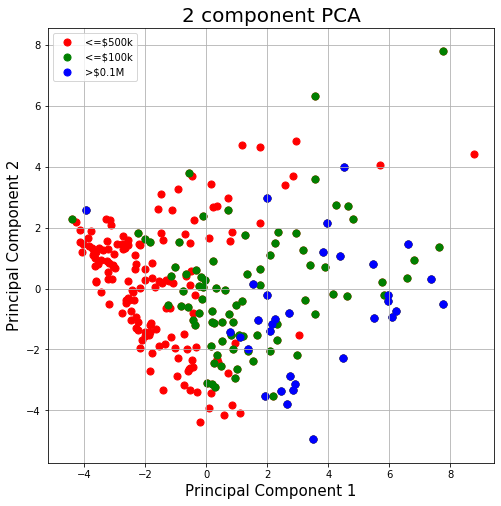

In [69]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
salaries = [0, 500, 1000]
colors = ['r', 'g', 'b']
for salary, color in zip(salaries,colors):
    indicesToKeep = finalDf['Salary'] >= salary
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['<=$500k', '<=$100k', '>$0.1M'])
ax.grid()

In [76]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
loading =np.transpose(pca.components_)
chart = pd.DataFrame(loading,columns =['PC 1','PC 2','PC 3','PC 4'],
                     index=indicators)
chart

,PC 1,PC 2,PC 3,PC 4
AtBat,0.195064,-0.384078,0.073262,-0.077338
Hits,0.194100,-0.377645,0.052328,-0.068722
HmRun,0.196905,-0.228663,-0.335869,-0.233200
Runs,0.194913,-0.374591,-0.061105,-0.126861
RBI,0.229566,-0.310265,-0.165085,-0.160202
Walks,0.206737,-0.231158,-0.064313,0.069321
Years,0.271085,0.268204,0.099577,-0.018776
CAtBat,0.319705,0.196413,0.128697,-0.002258
CHits,0.320773,0.185897,0.124966,0.012231
CHmRun,0.308101,0.133864,-0.114866,-0.086805


#### Conclusion
Career stats (C*) is most significant for PC1 while AtBat and Hits are major attributes for PC2 in latest season

### Reasons/ Numerical Attributes of Dataset-clustering

| Cluster                       | Pros        |         Cons   |
|-------------------------------|-------------|----------------|
| Centroid-based        | central vector represents grouping  | doesn't account for density/ noise |
| Distribution-based    | assumes Gaussian distribution       | limited to known distribution|
| Connectivity-based    |     distance   |      different shaped clusters     |
| Density-based (DBScan)|      mitigates noise   |      arbitrary radial distance; star-coordinates    |

### Choosing the best distribution
Judging from the plot with the two greatest components marked with categorical coloring of the salary, a centroid-based clustering alone doesn't account for the spread of salaries.  A DB-scan here is too complex for a 6-dimensional dataset. We are using linear regression as a simple method for principal component analysis, so our distribution for the dataset is unknown–a Distribution clustering would be inappropriate. The Connectivity-based can identify different shapes of clustering from the categorical data to compare to the flattened data set.  Ultimately a connectivity-centroid based cluster can best explain the combination of behaviors.

### Applying K-means clustering as a combination of connectivity-centroid based clustering

In [77]:
from sklearn.cluster import KMeans

In [78]:
Z=finalDf[['principal component 1','principal component 2']]
X=finalDf[['principal component 1']]
Y=finalDf[['principal component 2']]

In [79]:
connectivity_centroid=KMeans(n_clusters=3)
connectivity_centroid.fit(Z)
y_kmeans = connectivity_centroid.predict(Z)

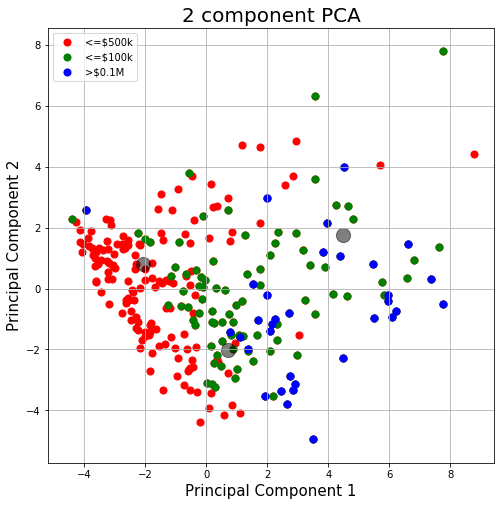

In [81]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
salaries = [0, 500, 1000]
colors = ['r', 'g', 'b']
for salary, color in zip(salaries,colors):
    indicesToKeep = finalDf['Salary'] >= salary
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['<=$500k', '<=$100k', '>$0.1M'])
ax.grid()

#plt.scatter(X, Y, c='b', s=50, cmap='viridis')

centers = connectivity_centroid.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Results
As we can see, the K-mean clustering of 3 produces overlaid on the categorical marking produces a plausible result to represent  connectivity and centroid clustering.

### Discussion
The clustering technique was applied to a 2D PCA result. For a dataset with high dimensionality, a scatter matrix of a pairwise comparison of the dimensions is generally used for exploratory visualization.  Applying dimension reduction is meaningful in capturing all the data relationships in one plot. Notice that principal components 1 and 2 only account for under 70% of the data. A strong 2D plot is one where the first two components account for at least 85% of the data. We achieve this at 4 principal components. For a 4D plot, visualizing in star coordinates is appropriate.